# Classificador de Imagens

In [1]:
# imports
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

> ### Dobre o Dataset: 
> O dataset CIFAR10 possui 60.000 imagens coloridas classificadas em 10 categorias balanceadas, isto é, cada categoria possui 6 mil imagens. Os dados estão divididos em 50.000 imagens para treinamento e 10.000 para testes.
>
> Vale ressaltar que as classes são mutualmente exclusivas, não há imagens com mais de uma categoria presente. Pela documentação sabemos que essas imagens devem ser classificadas em uma das seguintes categorias: avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão.

In [2]:
# Carregamento do DataSet
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalização de Pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

***As imagens possuem dimensão 32x32x3 ou seja, 32 pixels de largura e altura e 3 canais de cores.***

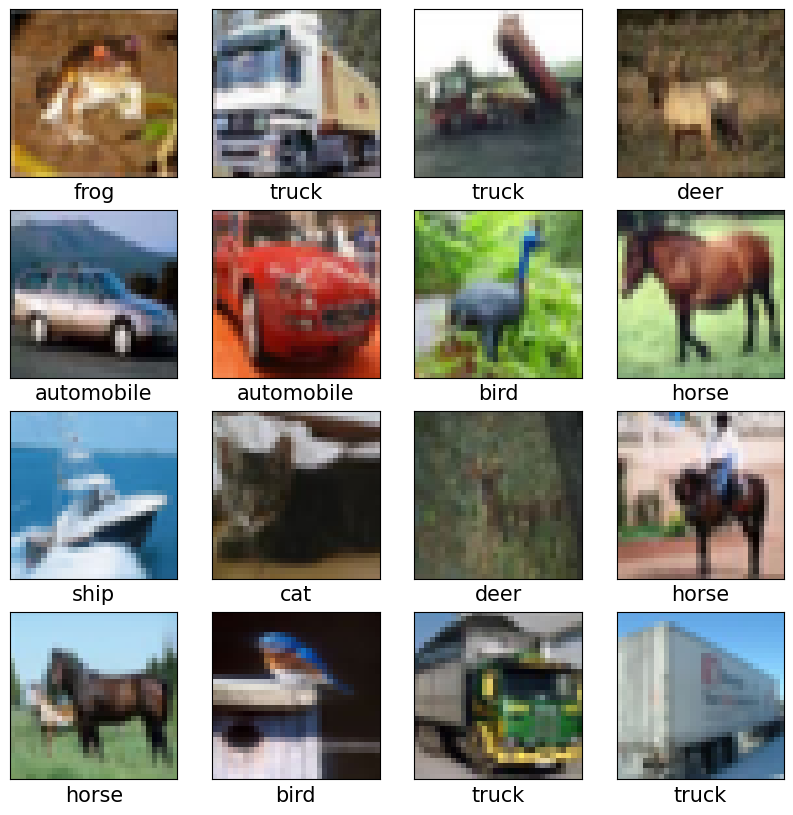

In [3]:
# Visualizando uma amostra dos dados
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
plt.show()

### Modelo

> A estrutura de modelo é composta de dois pares de convolução e agrupamento seguido de duas camadas totalmente conectadas. O resultado do model.summary() nos resume muito bem os parâmetros que fixamos no modelo juntamente das dimensões do dado em cada camada:

Este é um modelo de rede neural convolucional (CNN) implementado utilizando a biblioteca Keras, que é uma API de alto nível para redes neurais em TensorFlow. Vou explicar cada camada do modelo:

- **Camada de convolução (Conv2D)**:
    - Esta camada aplica um conjunto de filtros convolucionais à entrada.
    - `32` é o número de filtros convolucionais.
    - `(3, 3)` é o tamanho do kernel de convolução.
    - `activation='relu'` indica que a função de ativação ReLU (unidade linear retificada) é aplicada após a convolução.
    - `input_shape=(32, 32, 3)` especifica a forma dos dados de entrada. Neste caso, imagens coloridas de 32x32 pixels (altura, largura, canais de cor RGB).

- **Camada de MaxPooling**:
    - Esta camada reduz a dimensionalidade da imagem, mantendo apenas os valores máximos em regiões definidas pelo tamanho do pool.
    - `(2, 2)` é o tamanho da janela de pooling.

- **Camada de convolução (Conv2D)**:
    - Outra camada convolucional com 64 filtros convolucionais e um tamanho de kernel de `(3, 3)`.
    - `activation='relu'` aplica a função de ativação ReLU novamente.

- **Camada de MaxPooling**:
    - Outra camada de MaxPooling com uma janela de `(2, 2)`.

- **Camada de convolução (Conv2D)**:
    - Uma terceira camada convolucional com 64 filtros convolucionais e um tamanho de kernel de `(3, 3)`.
    - `activation='relu'` é aplicada mais uma vez.

- **Camada de Achatamento (Flatten)**:
    - Esta camada transforma a saída 2D das camadas convolucionais em um vetor unidimensional, que pode ser alimentado em camadas densas (totalmente conectadas).

- **Camada Densa (Dense)**:
    - Uma camada densa com 64 neurônios.
    - `activation='relu'` aplica a função de ativação ReLU.

- **Camada de Saída (Dense)**:
    - Última camada densa com 10 neurônios, correspondendo às 10 classes possíveis no conjunto de dados CIFAR-10.
    - Não há função de ativação especificada aqui, o que implica que esta camada é uma camada de saída linear.

Este modelo é adequado para classificação de imagens do conjunto de dados CIFAR-10, que consiste em 60.000 imagens coloridas de 32x32 pixels em 10 classes diferentes (como avião, carro, pássaro, gato, etc.). O modelo é treinado para aprender padrões nas imagens e atribuir a elas uma das 10 classes.


In [4]:
model = models.Sequential(name='CNN-CIFAR10')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              

***A camada layers.Flatten() serve para empilhar os elementos que estão disposto em várias matrizes em um único vetor. Ao todo nosso modelo possui 167.562 parâmetros para serem calibrados.***

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5361 - accuracy: 0.4379 - val_loss: 1.2598 - val_accuracy: 0.5416
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1712 - accuracy: 0.5852 - val_loss: 1.0692 - val_accuracy: 0.6198
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0171 - accuracy: 0.6430 - val_loss: 1.0393 - val_accuracy: 0.6412
Epoch 4/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9209 - accuracy: 0.6770 - val_loss: 0.9713 - val_accuracy: 0.6560
Epoch 5/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8507 - accuracy: 0.7030 - val_loss: 0.9614 - val_accuracy: 0.6637
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7964 - accuracy: 0.7206 - val_loss: 0.8775 - val_accuracy: 0.6936
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7439 - accuracy: 0.7393 - val_loss: 0.8825 -

In [6]:
# Acurácia final nos dados de treinamento e teste
train_accuracy = history.history['accuracy'][-1]
test_accuracy = history.history['val_accuracy'][-1]

print("Acurácia nos dados de treinamento:", train_accuracy)
print("Acurácia nos dados de teste:", test_accuracy)

Acurácia nos dados de treinamento: 0.8692399859428406
Acurácia nos dados de teste: 0.7064999938011169


Avaliando Modelo
Em apenas 50 épocas de treino nos encontramos um modelo com 90,0% de acurácia nos dados de treino e acurácia nos dados de testes de 68,0%! Isso um modelo simples que pode ser executado em minutos.

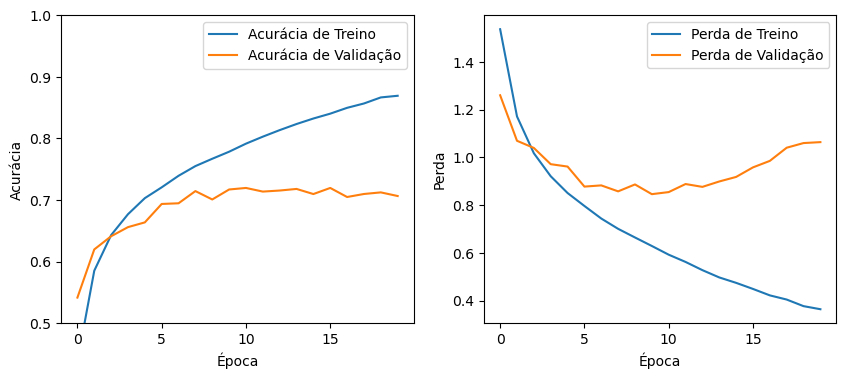

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()

In [8]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


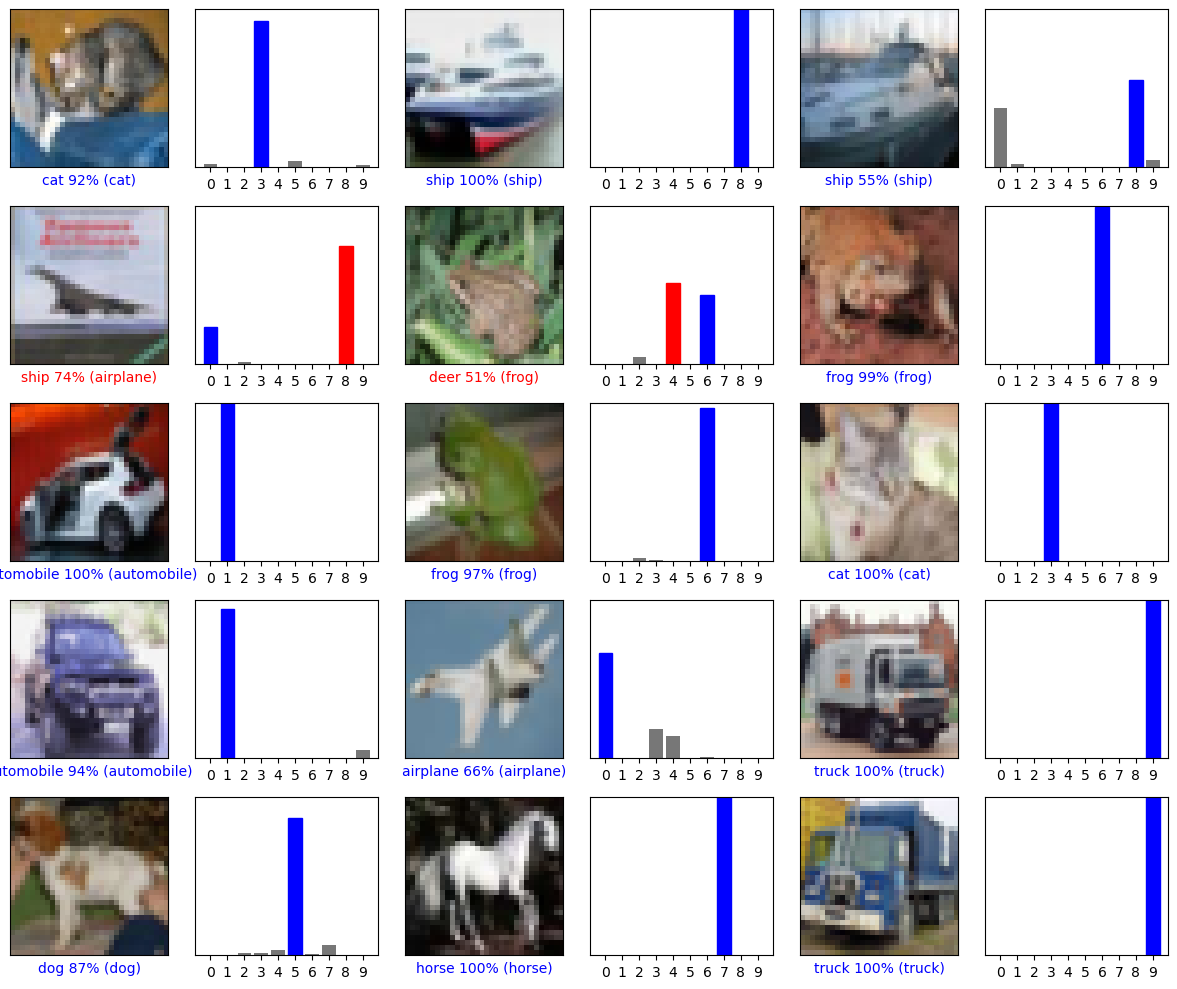

In [9]:
# Previsões corretas são marcadas em azul, erradas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

É interessante notar que os erros cometidos geralmente estão associados a probabilidades de classificação mais dispersas. Isso indica uma incerteza do modelo frente às imagens mal classificadas.